This notebook contains all the notes for the [Introduction to Deep Learning with PyTorch](https://classroom.udacity.com/nanodegrees/nd188-bert/dashboard/overview) content of the [Bertelsmann Tech Scholarship Challenge Course - AI Track Nanodegree Program](https://www.udacity.com/bertelsmann-tech-scholarships). 


# Introduction to Deep Learning with PyTorch


## Introduction to Neural Networks

### Linear Boundaries

With data of students' grades and tests we are trying to create a model to predict whether they will be accepted or rejected at a university. We will predict depending on the value of the score:

![specific linear boundary](https://www.dropbox.com/s/l2iun6yh5o401xo/Screenshot%202019-12-23%2023.46.12.png?dl=1)

In a general case our boundary will have weights $W$, inputs $x$, a bias $b$ and a label $y$ (which is what we are trying to predict) and we will try to find values for $W=(\omega_1, \omega_2)$ and $b$ that gives us a prediction $\hat{y}$ closer to $y$.

![general case for boundary line](https://www.dropbox.com/s/0o9j5xm4zpyl3iv/Screenshot%202019-12-23%2023.59.39.png?dl=1)

### Higher Dimensions

If the features are in higher dimensions we will have a boundary hyperplane. For example with 3 dimensions we will have:
![boundary hyperplane](https://www.dropbox.com/s/4kokyqzgv8biejt/Screenshot%202019-12-24%2000.20.26.png?dl=1)

### Perceptrons

For perceptrons we will use the inputs $x$, the weights $W$ and the bias $b$ to evaluate a linear function and the result will be evaluated in a _step function_ to predict a $1$ or $0$ output.

![perceptrons](https://www.dropbox.com/s/wwg1p9sibg2qf5v/Screenshot%202019-12-24%2000.49.05.png?dl=1)

### Why "Neural Networks"?

Because perceptrons look like neurons in the brain. Neurons in the brain takes inputs coming from the dendrites. These inputs are impulses. So what the neuron does is it does something with the nervous impulses and it decides if it outputs a nervous impulse or not, through the axon. The way we'll create neural networks later in this lesson is by concatenating this perceptrons so we'll be mimicking the way the brain connects neurons by taking the output from one and turning it into the output for another one.

![biological neurons](https://www.dropbox.com/s/b90pibdedopqw5n/Screenshot%202019-12-24%2001.21.47.png?dl=1)

### Perceptrons as Logical Operators

In this lesson, we'll see one of the many great applications of perceptrons. As logical operators! You'll have the chance to create the perceptrons for the most common of these, the AND, OR, and NOT operators. And then, we'll see what to do about the elusive XOR operator. Let's dive in!

#### AND Perceptron

![and perceptron](https://www.dropbox.com/s/50rxgsdv4slx9ub/Screenshot%202019-12-24%2003.10.47.png?dl=1)

Some weights and biases that work for the AND Perceptron:
* $\omega_1 = 1.0$
* $\omega_2 = 1.0$
* $b = -1.1$

In [1]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1.0
weight2 = 1.0
bias = -1.1


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -1.1                    0          Yes
       0          1                  -0.1                    0          Yes
       1          0                  -0.1                    0          Yes
       1          1                   0.9                    1          Yes


#### OR Perceptron

![or perceptron](https://www.dropbox.com/s/7miltw3tlzao0zv/Screenshot%202019-12-24%2003.11.01.png?dl=1)

Some weights and biases that work for the OR Perceptron:
* $\omega_1 = 1.0$
* $\omega_2 = 1.0$
* $b = -0.9$

#### NOT Perceptron

Unlike the other perceptrons we looked at, the NOT operation only cares about one input. The operation returns a **0** if the input is **1** and a **1** if it's a **0**. The other inputs to the perceptron are ignored.

Here are the weights (**weight1**, **weight2**) and bias **bias** to the values that calculate the NOT operation on the second input and ignores the first input.

In [2]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.0
weight2 = -1.0
bias = 0.9


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   0.9                    1          Yes
       0          1                  -0.1                    0          Yes
       1          0                   0.9                    1          Yes
       1          1                  -0.1                    0          Yes


#### XOR Perceptron

It takes two boolean inputs and returns a **True** if exactly one of them is **True**. This two points seem to be hard to separate by a line.

![XOR Perceptron](https://www.dropbox.com/s/m10jspiiemynn3b/Screenshot%202019-12-24%2003.40.12.png?dl=1)

Now, let's build a multi-layer perceptron from the AND, NOT, and OR perceptrons to create XOR logic! The multi-layer perceptron below calculates XOR. Each perceptron is a logic operation of AND, OR, and NOT.

![XOR Multi-Layer Perceptron](https://www.dropbox.com/s/kagymh2chfvrfdl/xor_multilayer.png?dl=1)

### Perceptron Trick

You used your logic and your mathematical knowledge to create perceptrons for some of the most common logical operators. In real life, though, we can't be building these perceptrons ourselves. The idea is that we give them the result, and they build themselves. For this, here's a pretty neat trick that will help us.

![Perceptron Trick](https://www.dropbox.com/s/12d8gk3h24j8e6y/Screenshot%202019-12-24%2004.18.14.png?dl=1)

If a point is misclassified it would want the line to get closer. For every misclassified point we want to take a small step, so we use a learning rate.

### Perceptron Algorithm

And now, with the perceptron trick in our hands, we can fully develop the perceptron algorithm!

1. Start with random weights: $\omega_1, \omega_2, ..., \omega_n, b$
2. For every misclassified point ($x_1, x_2, ..., x_n$)
    1. If $prediction = 0$:
        - For $i = 1, ..., n$
            * Change $\omega_i = \omega_i + \alpha x_i$
        - Change $b$ to $b + \alpha$
    2. If $prediction = 1$:
        - For $i = 1, ..., n$
            * Change $\omega_i = \omega_i - \alpha x_i$
        - Change $b$ to $b + \alpha$
        
#### Coding the Perceptron Algorithm

We'll have the chance to implement the perceptron algorithm to separate the following data (given in the file data.csv).
![points to be classified](https://www.dropbox.com/s/iyvvu29qjsbs74z/points_perceptron_algorithm.png?dl=1)

In [3]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


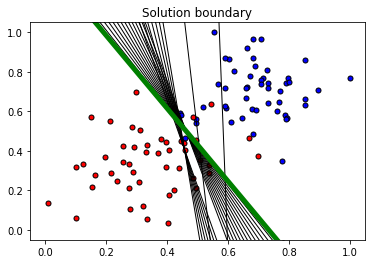

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--', linewidth=1.0):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color, linewidth=linewidth)

data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plt.title("Solution boundary")
plot_points(X,y)

boundary_lines = trainPerceptronAlgorithm(X, y)
for m, b in boundary_lines:
    display(m, b, 'black')

display(boundary_lines[-1][0], boundary_lines[-1][1], 'green', linewidth=5.0)
plt.show()

### Non-linear Regions

Usually our data will not be linearly separable. We need to find a perceptron algorithm for lines in a way that it generalizes to other types of curves.

![non linear regions](https://www.dropbox.com/s/nidip91pwqkd396/Screenshot%202019-12-25%2019.38.25.png?dl=1)

### Error Functions

We will find the values of the parameters of our model with the help of an error function. It's simply a function that tells us how close our model is to the ideal function. Then the approach will be to find a step in our parameter space towards which we can reduce the error.

In order to be able to decide between different tiny steps at each point in our parameter space we need to have a continuous and differentiable error function so that we can discriminate between different options and don't have a problem similar to deciding which step to make to descend from an Aztec pyramid. We need continuity and differentiability to apply gradient descent.

![discrete vs continuous error function](https://www.dropbox.com/s/jwsrce9z27qkqfw/Screenshot%202019-12-25%2019.53.33.png?dl=1)

### Discrete vs Continuous

In order for error functions to work for gradient descent we need to also have continuous predictions. So lets change the activation function to a continuous one.

![Step function vs sigmoid function](https://www.dropbox.com/s/i7luoy5y171lckf/Screenshot%202019-12-29%2000.37.50.png?dl=1)

![probability space for sigmoid](https://www.dropbox.com/s/4x091q0k8whuc6s/Screenshot%202019-12-29%2000.42.36.png?dl=1)

![Sigmoid in the perceptron](https://www.dropbox.com/s/eu1unmckezpq15x/Screenshot%202019-12-02%2001.50.00.png?dl=1)

### Softmax (for Multi-Class Classification)

For each class we have a linear function with scores $Z_1, Z_2, ..., Z_n$.
Then $P(class_i) = \frac{e^{Z_i}}{\sum_{k=1}^n e^{Z_k}}$

*Note*: Easy to prove that softmax for $n=2$ gives the same values as the sigmoid function.

In [5]:
# Here is the code for the Softmax function in Python
import numpy as np

# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
    expL = np.exp(L)
    return expL/np.sum(expL)

### One-Hot Encoding

When we have categorical data (data related with classes) we create a variable for each of our classes. This is One-Hot Encoding.

![One-Hot Encoding](https://www.dropbox.com/s/elmf4xdfmadkcit/Screenshot%202019-12-02%2020.21.43.png?dl=1)

### Maximum Likelihood

We are still on our quest to find an algorithm that helps us select the best model that separates our data. Since we are dealing with probabilities, lets use them in our favor.

What we do in Maximum Likelihood is pick the model that gives the existing labels the highest probability.

Say we have 2 models and we want to compare which one is better.

![comparing 2 models](https://www.dropbox.com/s/xe8d3rltbk5zlbm/Screenshot%202019-12-29%2001.28.47.png?dl=1)

Clearly the one in the right is better but lets look at it from a probability perspective and see why the arrangement in the right is much more likely.

In this example, that the prediction $\hat{y} = \sigma (Wx + b)$ predicts the probability of getting blue $P(blue)$.

In general what we want is: for each model calculate the probability that the points are of the label that they actually are.

![probabilities of their particular labels](https://www.dropbox.com/s/ifft573m4w9bfv3/Screenshot%202019-12-29%2001.38.41.png?dl=1)

If we assume that the label of each data point are independent events, then the probability of the whole arrangement is the product of the probabilities of all points.

![probability of whole arrangement](https://www.dropbox.com/s/8q537lehjypr1w3/Screenshot%202019-12-29%2001.41.57.png?dl=1)

This probability is the probability of all data points having these labels under that particular model.

If we do the same thing with the model on the right we have the following:

![comparing probabilities for both models](https://www.dropbox.com/s/ymjeftg96z25csa/Screenshot%202019-12-29%2001.44.51.png?dl=1)

This is much higher than the model on the left. 

So say we start with the model on the left. If we find a way to maximize this probability we can take this probability all the way to 0.3024. So that's our new goal.

### Maximizing probabilities and Maximum Likelihood

Could we obtain an error function from the probabilities? Could it be that maximizing the probability (maximum likelihood) be equivalent to minimizing the error function?

It's a bit of a problem to work with a big product of probabilities because we are multiplying small values that might cause some numerical issue and by changing one value in the product we can get a very different result. So to change products into sums we will use the $\log$ function.

### Cross-Entropy

![sum of negative of logarithm of probabilities](https://www.dropbox.com/s/rrzxhpfvq18fh19/Screenshot%202019-12-29%2002.19.34.png?dl=1)

Notice that all the logarithms of probabilities are negative numbers (since they are between 0 and 1), so it makes sense to take the negative of the logarithm of the probabilities. We call this sum the cross-entropy. A bad model will give us a high cross-entropy and a good model will give us a low cross-entropy.

![negative of logarithm of each probability](https://www.dropbox.com/s/nitx9co9dzujaza/Screenshot%202019-12-29%2002.28.29.png?dl=1)

If we look carefully at the values we can see that the points that are misclassified have large values whereas the points that are correctly classified have small values.

The goal is changed from maximizing the probability to minimizing cross-entropy.

Cross Entropy: "If I have a bunch of events and a bunch of probabilities, how likely is it that those events happen with those probabilities?"

*Example*: Say we have the probabilities of having a gift behind different doors. Lets calculate the cross entropy of different results

![cross entropy for each scenario](https://www.dropbox.com/s/pjzir02kjmq2kfp/Screenshot%202019-12-29%2002.34.45.png?dl=1)

![definitions and formula](https://www.dropbox.com/s/uukvhkd3jr171dg/Screenshot%202019-12-29%2002.39.10.png?dl=1)

The notation at the right of the image gives us more clarity on the fact that the cross entropy really tells us weather two vectors are similar or different.

Let's code the formula for cross-entropy in Python.

In [6]:
import numpy as np

# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.
def cross_entropy(Y, P):
    Y = np.array(Y)
    P = np.array(P)
    return -np.sum(Y*np.log(P) + (1 - Y)*np.log(1 - P))

### Multi-Class Cross-Entropy

$$
cross-entropy = - \sum_{i=1}^n \sum_{j=1}^m y_{ij} \ln{p_{ij}}
$$
where
$y_{ij} =
\begin{cases}
1 \hspace{3ex} \text{ if event j has class i}\\
0 \hspace{3ex} \text{ otherwise}
\end{cases}$

and
$p_{ij} = P(\text{event j has class i})$

A higher cross-entropy implies a lower probability for an event.

### Logistic Regression

This is one of the most popular and useful algorithms in Machine Learning, and the building block of all that constitutes Deep Learning. The Logistic Regression Algorithm. And it basically goes like this:

* Take your data
* Pick a random model
* Until satisfied with the model:
    * Calculate the error
    * Minimize the error, and obtain a better model
    
#### Calculating the Error Function

For 2 classes the error function is $= -\frac{1}{m} \sum_{i=1}^m (1 - y_i) \ln{(1 - \hat{y_i})} + y_i \ln{\hat{y_i}}$

In terms of the weight and bias:
$$
E(W, b) = - \frac{1}{m} \sum_{i=1}^m \big[ (1 - y_i) \ln{(1 - \sigma (Wx^{(i)} + b)) + y_i \ln{(\sigma (Wx^{(i)} + b))} \big]}
$$

For multiclass classification we use the cross-entropy which is just a generalization of the formula above except that we will have a model for each class.

### Gradient Descent

Using gradient descent we will improve our model step by step by minimizing the error function.

The negative of the gradient gives us the direction where we can decrease the function the most.
Say we have our model $\hat{y} = \sigma (\omega_1 x_i + \ldots + \omega_n x_n + b)$.

Now, with the gradient of the error function:
$$\nabla E = \left( \frac{\partial E}{\partial \omega_1}, \frac{\partial E}{\partial \omega_2}, \cdots, \frac{\partial E}{\partial \omega_n}, \frac{\partial E}{\partial b} \right)$$
and a learning rate $\alpha$ (say 0.1) we update our weights and bias by
$$
\omega'_i = \omega_i - \alpha \frac{\partial E}{\partial \omega_i} \\
b'_i = b - \alpha \frac{\partial E}{\partial b}
$$
So our new (probably better) model is:
$$
\hat{y} = \sigma (W'x + b')
$$

This is one single step of gradient descent and we will have a certain criteria on when to stop iterating and get our final model.

#### Gradient Calculation

Lets compute the derivative of the error function. The first thing to notice is that the sigmoid function has a really nice derivative. Namely,
$$
\sigma'(x) = \sigma(x) (1 - \sigma(x))
$$
We can calculate it using the quotient formula:
\begin{align}
\sigma'(x) &= \frac{\partial}{\partial x} \frac{1}{1 + e^{-x}} \\
&= \frac{e^{-x}}{(1 + e^{-x})^2} \\
&= \frac{1}{1 + e^{-x}} \frac{e^{-x}}{1 + e^{-x}} \\
&= \sigma(x) (1 - \sigma(x))
\end{align}

And now, let's recall that if we have mm points labelled $x^{(1)}, x^{(2)}, \ldots, x^{(m)}$, the error formula is:

$$
E = -\frac{1}{m} \sum_{i=1}^m \left( y_i \ln{\hat{y_i}} + (1 - y_i) \ln{(1 - \hat{y})} \right)
$$
Where the prediction is given by $\hat{y} = \sigma (Wx + b)$.

Our goal is to calculate the gradient of E at a point $x = (x_1, \ldots, x_n)$, given by the partial derivatives

$$
\nabla E = \left( \frac{\partial E}{\partial \omega_1}, \frac{\partial E}{\partial \omega_2}, \cdots, \frac{\partial E}{\partial \omega_n}, \frac{\partial E}{\partial b} \right)
$$

To simplify our calculations, we'll actually think of the error that each point produces, and calculate the derivative of this error. The total error, then, is the average of the errors at all the points. The error produced by each point is, simply,

$$
E = - y \ln{\hat{y}} - (1 - y) \ln{(1 - \hat{y})}
$$

In order to calculate the derivative of this error with respect to the weights, we'll first calculate $\frac{\partial}{\partial w_j} \hat{y}$. Recall that $\hat{y} = \sigma(Wx+b)$, so:

\begin{align}
\frac{\partial}{\partial w_j} \hat{y} &= \frac{\partial}{\partial w_j} \sigma(Wx+b) \\
&= \sigma(x) (1 - \sigma(x)) \frac{\partial}{\partial w_j} (Wx+b) \\
&= \hat{y} (1 - \hat{y}) \frac{\partial}{\partial w_j} (Wx+b) \\
&= \hat{y} (1 - \hat{y}) \frac{\partial}{\partial w_j} (\omega_1 x_i + \ldots + \omega_n x_n + b) \\
&= \hat{y} (1 - \hat{y}) x_j
\end{align}

The last equality is because the only term in the sum which is not a constant with respect to $w_j$ is precisely $w_j x_j$, which clearly has derivative $x_j$.

Now, we can go ahead and calculate the derivative of the error $E$ at a point $x$, with respect to the weight $w_j$.

![partial derivative of E with respect to w_j](https://www.dropbox.com/s/1x7g5zd767r7q05/partialEwrtwj.png?dl=1)

A similar calculation will show us that
![partial derivative of E with respect to b](https://www.dropbox.com/s/nbdlbhwpjemh7kd/partialEwrtb.gif?dl=1)

In summary, the gradient of the error function at each point is:
$$
\nabla E = - (y - \hat{y})(x_1, x_2, \ldots, x_n, 1)
$$

**The gradient is actually a scalar times the coordinates of the point! And what is the scalar? Nothing less than the difference between the label and the prediction.**

You can also see that the closer the label to the prediction, the smaller the gradient and viceversa.

#### Gradient Descent Step

Therefore, since the gradient descent step simply consists in substracting a multiple of the gradient of the error function at every point, then this updates the weights in the following way:
$$
\omega'_i \longleftarrow \omega_i - \alpha \big[ -(y - \hat{y}) x_i \big] = \omega_i + \alpha (y - \hat{y}) x_i
$$
and
$$
b' \longleftarrow b + \alpha (y - \hat{y})
$$
where $\alpha$ is really $\frac{\alpha}{m}$ but we abuse the notation.

### Gradient Descent Algorithm

1. Start with random weights $\omega_1, \omega_2, \ldots, \omega_n, b$
2. For every point $(x_1, x_2, \ldots, x_n)$:
    1. For $i = 1 \ldots n$
        1. Update $\omega'_i \longleftarrow \omega_i + \alpha (y - \hat{y}) x_i$
        2. Update $b' \longleftarrow b + \alpha (y - \hat{y})$
3. Repeat until error is small

#### Implementing Gradient Descent

We will implement the gradient descent algorithm on the following sample dataset with two classes.

![dataset for gradient descent](https://www.dropbox.com/s/axdbr9htzndswj6/dataset-for-gradient-descent.png?dl=1)

We'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

##### Reading and plotting the data

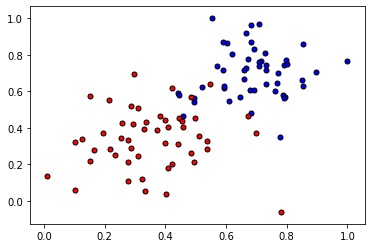

In [8]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

##### TODO: Implementing the basic functions

Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [9]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias

##### Training function

This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [10]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

##### Time to train the algorithm!

When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669508
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.4593334641861401
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469976
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3973461571671399
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3741469765239074
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3379273658879921
Accuracy:  0.94


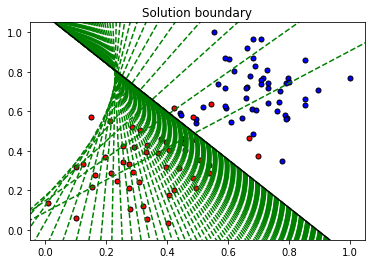

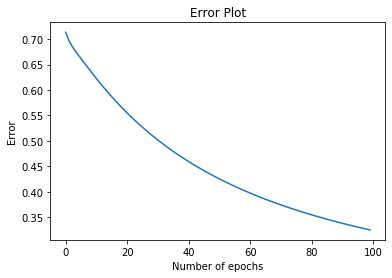

In [11]:
train(X, y, epochs, learnrate, True)

### Gradient Descent vs Perceptron Algorithm

In both gradient descent and the perceptron algorithm we have that we change $\omega_i$ to $\omega_i + \alpha (y - \hat{y}) x_i$. The only difference is that in the perceptron algorithm $\hat{y}$ can only take the values of 1 and 0.

In gradient descent if the point is incorrectly classified it tries to make the line come closer and if it is correctly classified it asks to go farther.

### Continuous Perceptron

The boundary line (or plane) gives rise to a perceptron where we label the edges by the weights and the node by the bias.

![continuous perceptron](https://www.dropbox.com/s/3ey5733bkb9vvmc/Screenshot%202019-12-30%2020.13.02.png?dl=1)

### Non-Linear Models

We need new models to separate non-linear data like this one:
![non-linearly separable data](https://www.dropbox.com/s/taymf6629k0kmzg/Screenshot%202019-12-30%2020.18.43.png?dl=1)

### Neural Network Architecture

We can create linear combinations of linear models to obtain non-linear models and use sigmoid functions to convert them into a probability space. It's like doing arithmetic with models.

![combining linear models](https://www.dropbox.com/s/dtrb3879i2yz501/Screenshot%202019-12-13%2018.12.44.png?dl=1)

Say we have 2 linear models that separate our data.

![2 linear models](https://www.dropbox.com/s/qqqqkle6beg63bp/Screenshot%202019-12-30%2020.46.51.png?dl=1)

Lets now use another perceptron to combine these 2 models using the linear equation $7\cdot\text{(first model)} + 5\cdot\text{(second model)} - 6$.

![combining 2 models](https://www.dropbox.com/s/z5ttszhciyh3e2j/Screenshot%202019-12-30%2020.49.00.png?dl=1)

And with this we obtain a neural network:
![neural network](https://www.dropbox.com/s/p4u8oqvkt214z83/Screenshot%202019-12-13%2018.16.20.png?dl=1)

#### Notation

We have 2 main notations for neural networks: one where we write the bias inside the node and one where we write the bias as a separate node.

![2 different notations for neural networks](https://www.dropbox.com/s/tuo0o0mwb1b9ahp/Screenshot%202019-12-30%2021.02.17.png?dl=1)

#### Multiple Layer

Now, not all neural networks look like the one above. They can be way more complicated! In particular, we can do the following things:
* Add more nodes to the input, hidden, and output layers.
* Add more layers.

The first layer is called the **input layer**, which contains the inputs. Then we have the **hidden layers** which are layers that are sets of linear models created by linear combinations of models in other hidden layers or of the input layer. Finally we have the **output layer** where we have our predictions.

![layers of a neural network](https://www.dropbox.com/s/rqb0pqxlpkij6oi/Screenshot%202019-12-30%2021.20.14.png?dl=1)

We can have different architectures:
![several nodes in hidden layer](https://www.dropbox.com/s/wx26inr0pnb3o8p/Screenshot%202019-12-30%2021.21.28.png?dl=1)

![boundary planes](https://www.dropbox.com/s/db1pxgp9kos2sbz/Screenshot%202019-12-30%2021.22.01.png?dl=1)

![multiclass classification](https://www.dropbox.com/s/khiqcusgvzvzlaw/Screenshot%202019-12-30%2021.22.49.png?dl=1)

![multiple hidden layers](https://www.dropbox.com/s/yhks241iy6f1xun/Screenshot%202019-12-30%2021.24.05.png?dl=1)

We can obtain highly complex models with lots of hidden layers. Many of the models in real life (for self-driving cars, game-playing agents, etc.) have many many hidden layers.

![neural networks architecture in general](https://www.dropbox.com/s/3532zl9omk0mi1p/Screenshot%202019-12-30%2021.24.32.png?dl=1)

#### Multi-Class Classification

We add more nodes in the output layer and each node will give us the probability that the input is contained in each of the classes. Now we take this scores and apply the Softmax Function to obtain well defined probabilities.

### Feedforward

We need to learn how to train Neural Networks. What this means is that we need to find the parameters (weights and biases of all the neural network) that models the data well.

Feedforward is the process neural networks use to turn the input into an output. For feedforward we will have matrices of weights with matrix $W^{(1)}$ for the first layer, $W^{(2)}$ for the second layer and so on until the final layer. The notation for the elements in the matrices of weights is as follows:
\begin{align}
W_{ij}^{(k)} &= \text{weight in the matrix of the (k+1)th layer that multiplies the value in the ith node} \\
& \hspace{3ex} \text{of the kth layer to be used in the linear model for the jth node of the (k+1)th layer}
\end{align}

![feedforward process](https://www.dropbox.com/s/xj37qfegnk872n6/Screenshot%202019-12-30%2023.43.52.png?dl=1)

So feedforward is just the process of applying a sequence of linear models and sigmoid functions to the input to get our output.

#### Error Function

Just as before, neural networks will produce an error function, which at the end, is what we'll be minimizing.
In a multilayer neural network our error function will be the same:
$$
E(W) = - \frac{1}{m} \sum_{i=1}^m \left[ y_i \ln{\hat{y_i}} + (1 - y_i) \ln(1 - \hat{y_i}) \right]
$$

except that now the prediction $\hat{y}$ is different:
$$
\hat{y} = \sigma \circ W^{(3)} \circ \sigma \circ W^{(2)} \circ \sigma \circ W^{(1)} (x)
$$

### Backpropagation

Now, we're ready to get our hands into training a neural network. For this, we'll use the method known as backpropagation. In a nutshell, backpropagation will consist of:

* Doing a feedforward operation.
* Comparing the output of the model with the desired output.
* Calculating the error.
* Running the feedforward operation backwards (backpropagation) to spread the error to each of the weights.
* Use this to update the weights, and get a better model.
* Continue this until we have a model that is good.

With backpropagation what we are doing is to look at each weight and update them in a way that it improves our model. For that we need to propagate the errors. Here is a visual example of how we would want to change the weights of a small neural network.

![updating weights of output layer](https://www.dropbox.com/s/09tw74tej4utgrq/Screenshot%202019-12-31%2000.55.17.png?dl=1)

If we ask our final model about how it would to change the weights that go from the nodes of the previous layer to itself it would say that the model at the top is incorrectly classifying and the model at the bottom is correctly classifying so it would like to decrease the weight that goes from the model at the top and increase the weight from the model at bottom. This will get the boundary closer to the misclassified point.

Now we propagate the error backwards (backpropagate) to see how we can change the weights of the hidden layer.

![updating weights of hidden layer](https://www.dropbox.com/s/r4guuh3j9krhs5n/Screenshot%202019-12-31%2000.56.56.png?dl=1)

Here we ask each model in the hidden layer what changes in the weights would it want to make to improve the prediction and we update those weights correspondingly.

#### Backpropagation Math

As we do with perceptrons, for the multilayer perceptron we need to calculate the gradient of the error function $\nabla E = \left( \ldots, \frac{\partial E}{\partial W_{ij}^{(k)}}, \ldots, \frac{\partial E}{\partial b^{(k)}} \right)$ except that now we have multiple weight matrices that participate in the prediction: $\hat{y} = \sigma \circ W^{(3)} \circ \sigma \circ W^{(2)} \circ \sigma \circ W^{(1)} (x)$.

And we will update the weights using gradient descent:
$$
{W'}_{ij}^{(k)} \longleftarrow {W}_{ij}^{(k)} - \alpha \frac{\partial E}{\partial W_{ij}^{(k)}}
$$

But what is $\frac{\partial E}{\partial W_{ij}^{(k)}}$?

Well, $E(W) = - \frac{1}{m} \sum_{i=1}^m \left[ y_i \ln{\hat{y_i}} + (1 - y_i) \ln(1 - \hat{y_i}) \right]$ and

![formulas for variables](https://www.dropbox.com/s/93snjuylqn09l7s/Screenshot%202019-12-14%2011.58.51.png?dl=1)

In this case, by the chain rule,
$$
\frac{\partial E}{\partial W_{11}^{(1)}} = \frac{\partial E}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h} \frac{\partial h}{\partial h_1} \frac{\partial h_1}{\partial W_{11}^{(1)}}
$$

### Predicting Student Admissions with Neural Networks

We'll analyze a dataset of student admissions at UCLA.

In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

#### Loading the data
To load the data and format it nicely, we will use two very useful packages called Pandas and Numpy. You can read on the documentation here:
- https://pandas.pydata.org/pandas-docs/stable/
- https://docs.scipy.org/

In [12]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('student_data.csv')

# Printing out the first 10 rows of our data
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


#### Plotting the data

First let's make a plot of our data to see how it looks. In order to have a 2D plot, let's ingore the rank.

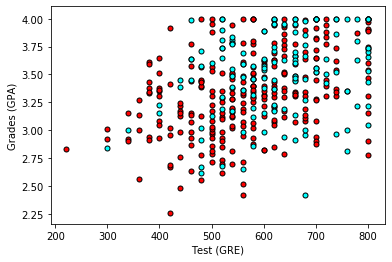

In [13]:
# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

Roughly, it looks like the students with high scores in the grades and test passed, while the ones with low scores didn't, but the data is not as nicely separable as we hoped it would. Maybe it would help to take the rank into account? Let's make 4 plots, each one for each rank.

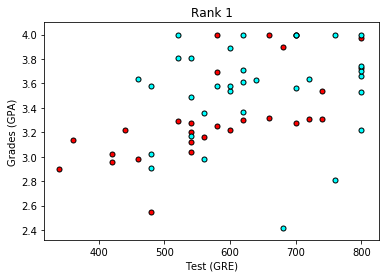

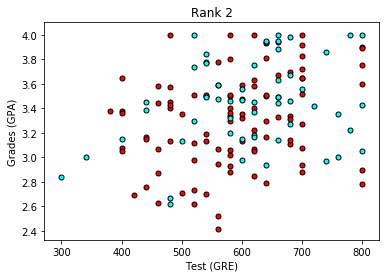

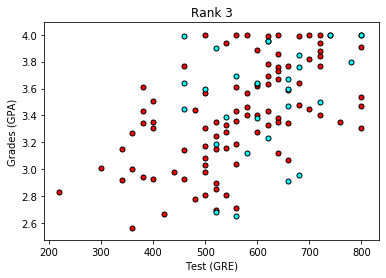

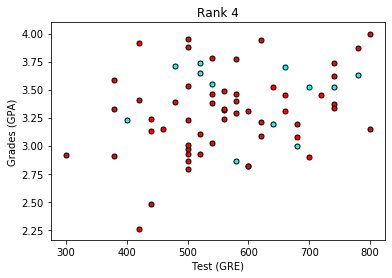

In [14]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

This looks more promising, as it seems that the lower the rank, the higher the acceptance rate. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

#### TODO: One-hot encoding the rank
Use the `get_dummies` function in pandas in order to one-hot encode the data.

Hint: To drop a column, it's suggested that you use `one_hot_data`[.drop( )](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html).

In [15]:
# TODO: Drop the previous rank column
one_hot_data = pd.get_dummies(data, columns=["rank"])

# Print the first 10 rows of our data
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


#### TODO: Scaling the data
The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [16]:
# Copying our data
processed_data = one_hot_data[:]

# Scaling the columns
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


#### Splitting the data into Training and Testing

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

In [17]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
263      1  0.775  0.9875       0       0       1       0
304      0  0.275  0.7075       0       0       1       0
172      0  0.850  0.8700       0       0       1       0
379      0  0.675  0.6750       0       1       0       0
290      1  0.775  0.8625       0       1       0       0
261      0  0.550  0.7875       0       1       0       0
186      0  0.700  0.9025       0       0       1       0
274      0  0.650  0.7800       0       1       0       0
43       0  0.625  0.8275       0       0       1       0
7        0  0.500  0.7700       0       1       0       0
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
1       1  0.825  0.9175       0       0       1       0
14      1  0.875  1.0000       1       0       0       0
18      0  1.000  0.9375       0       1       0       0
50      0  0.800  0.9650       0       0       1       0
57      0  

#### Splitting the data into features and targets (labels)
Now, as a final step before the training, we'll split the data into features (X) and targets (y).

In [18]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

       gre     gpa  rank_1  rank_2  rank_3  rank_4
263  0.775  0.9875       0       0       1       0
304  0.275  0.7075       0       0       1       0
172  0.850  0.8700       0       0       1       0
379  0.675  0.6750       0       1       0       0
290  0.775  0.8625       0       1       0       0
261  0.550  0.7875       0       1       0       0
186  0.700  0.9025       0       0       1       0
274  0.650  0.7800       0       1       0       0
43   0.625  0.8275       0       0       1       0
7    0.500  0.7700       0       1       0       0
263    1
304    0
172    0
379    0
290    1
261    0
186    0
274    0
43     0
7      0
Name: admit, dtype: int64


#### Training the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some helper functions.

In [19]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

#### TODO: Backpropagate the error

Here is where something seems to be wrong. The original notebook states the following:
> Now it's your turn to shine. Write the error term. Remember that this is given by the equation $$ (y-\hat{y}) \sigma'(x) $$

And this error term is being used to update the weights in the following way:
$$\omega' = \omega + \frac{\alpha}{m} \sum\limits_{i=1}^m errorTerm(x_i) x_i$$
where $x_i$ is the vector of features of the ith student.

However, according to lesson 3.23 we have that $\frac{\partial}{\partial \omega_j} E = - (y - \hat{y}) x_j$ for a single data point and according to lesson 3.24 we have that $\omega' = \omega + \frac{\alpha}{m} \sum\limits_{i=1}^m (y - \hat{y}) x_i$ so the error term is $y - \hat{y}$ (where $y$ and $\hat{y}$ are different for each student).
![title](https://www.dropbox.com/s/51p9h3gr7uwo8nw/Screenshot%202019-12-03%2005.12.35.png?dl=1)

You can also see this by calculating the partial derivatives with respect to each weight.

For example, for two weights, if we set the following functions:
\begin{align}
E(\hat{y}) & = -\frac{1}{m} \sum\limits_{i=1}^m [y_i \ln{\hat{y}} + (1 - y_i) \ln{(1-\hat{y_i})}] \\
\hat{y} & = \sigma (h) \\
h(\omega_1, \omega_2) &= \omega_1 x_1 + \omega_2 x_2 + b
\end{align}

We have that:
\begin{align}
\frac{\partial E}{\partial \hat{y}} & = \frac{\partial}{\partial \hat{y}} \big[ -\frac{1}{m} \sum\limits_{i=1}^m [y_i \ln{\hat{y}} + (1 - y_i) \ln{(1-\hat{y_i})}] \big] \\
& = -\frac{1}{m} \sum\limits_{i=1}^m \frac{\partial}{\partial \hat{y}} \big[ y_i \ln{\hat{y}} + (1 - y_i) \ln{(1-\hat{y_i})} \big] \\
& = -\frac{1}{m} \sum\limits_{i=1}^m \big[ y_i \frac{\partial}{\partial \hat{y}} \ln{\hat{y}} + (1 - y_i) \frac{\partial}{\partial \hat{y}} \ln{(1-\hat{y_i})} \big] \\
& = -\frac{1}{m} \sum\limits_{i=1}^m \big[ \frac{y_i}{\hat{y}} - \frac{1 - y_i}{1-\hat{y_i}} \big] \\
& = -\frac{1}{m} \sum\limits_{i=1}^m \frac{y_i - \hat{y}}{\hat{y_i} (1-\hat{y_i})} \\ \\
\frac{\partial \hat{y}}{\partial h} & = \frac{\partial}{\partial h} \sigma (h) \\
& = \sigma (h) (1 - \sigma (h)) \\ \\
\frac{\partial h}{\partial \omega_i} & = \frac{\partial}{\partial \omega_i} \big[ \omega_1 x_1 + \omega_2 x_2 + b \big] \\
& = x_i
\end{align}

So, by the chain rule (and noting that $\sigma (h) = \hat{y}$):
\begin{align}
\frac{\partial E}{\partial \omega_i} & = \frac{\partial E}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h} \frac{\partial h}{\partial \omega_i} \\
& = -\frac{1}{m} \sum\limits_{i=1}^m \frac{y_i - \hat{y}}{\hat{y_i} (1-\hat{y_i})} \sigma (h) (1 - \sigma (h)) x_i \\
& = -\frac{1}{m} \sum\limits_{i=1}^m (y_i - \hat{y})x_i
\end{align}

So this and lesson 3.24 suggest that the error term should be $y_i - \hat{y}$. Lets now try this in code. Below we have the code for the error term as suggested in [the solutions](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/intro-neural-networks/student-admissions/StudentAdmissionsSolutions.ipynb) and the error with the formula we got. We will name all the variables for the new formula with a *new* prefix.

In [20]:
# TODO: Write the error term formula
def error_term_formula(x, y, output):
    return (y - output) * sigmoid_prime(x)

def new_error_term_formula(x, y, output):
    return (y - output) * x

# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None
    new_last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    new_weights = np.copy(weights)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        new_del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))
            new_output = sigmoid(np.dot(x, new_weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)
            new_error_term = new_error_term_formula(x, y, new_output)

            # print(error_term - new_error_term)
            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x
            new_del_w += new_error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        #print("weights: ", weights)
        weights += learnrate * del_w / n_records
        #print("updated weights: ", weights)
        #print("new_weights: ", new_weights)
        new_weights += learnrate * new_del_w / n_records
        #print("updated new_weights: ", new_weights)

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            new_out = sigmoid(np.dot(features, new_weights))
            loss = np.mean((out - targets) ** 2)
            new_loss = np.mean((new_out - targets) ** 2)
            print("Epoch:", e)
            print("Error term: ", error_term)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("New error term: ", new_error_term)
            if new_last_loss and new_last_loss < new_loss:
                print("New train loss: ", new_loss, "  WARNING - Loss Increasing")
            else:
                print("New train loss: ", new_loss)
            new_last_loss = new_loss
            print("=========")
    print("Finished training!")
    return weights, new_weights
    
weights, new_weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Error term:  [-0.10690956 -0.10182026 -0.12615637 -0.12615637 -0.09921539 -0.12615637]
Train loss:  0.27106480594226784
New error term:  [-0.41631603 -0.47560953 -0.         -0.         -0.50462549 -0.        ]
New train loss:  0.25851149347469743
Epoch: 100
Error term:  [-0.05062137 -0.04821161 -0.05973469 -0.05973469 -0.04697821 -0.05973469]
Train loss:  0.21194326681500797
New error term:  [-0.18768718 -0.21441839 -0.         -0.         -0.22749962 -0.        ]
New train loss:  0.20648112434425575
Epoch: 200
Error term:  [-0.04755269 -0.045289   -0.05611355 -0.05611355 -0.04413037 -0.05611355]
Train loss:  0.20966804365075242
New error term:  [-0.18864743 -0.2155154  -0.         -0.         -0.22866355 -0.        ]
New train loss:  0.20504475859944007
Epoch: 300
Error term:  [-0.04625298 -0.04405116 -0.05457985 -0.05457985 -0.0429242  -0.05457985]
Train loss:  0.20854655900426197
New error term:  [-0.19200892 -0.21935565 -0.         -0.         -0.23273809 -0.        ]
New

#### Calculating the Accuracy on the Test Data

In [21]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
new_test_out = sigmoid(np.dot(features_test, new_weights))
predictions = test_out > 0.5
new_predictions = new_test_out > 0.5
print(test_out - new_test_out)
accuracy = np.mean(predictions == targets_test)
new_accuracy = np.mean(new_predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))
print("New prediction accuracy: {:.3f}".format(new_accuracy))

[-0.03801198 -0.07536693 -0.10231521 -0.0393842   0.06386647 -0.05119861
 -0.05915155 -0.00514353  0.01955656 -0.00053217 -0.11040379 -0.02619905
  0.06460569  0.03711334  0.05141434  0.00709628 -0.04866455 -0.00560511
  0.06905985  0.03517336  0.00012136 -0.01891887 -0.02054697  0.01852341
 -0.04155474 -0.01543541 -0.09262526 -0.03688688 -0.0075775  -0.03843417
 -0.04254515  0.00598112 -0.07617859 -0.03009846  0.01739084 -0.06734743
 -0.02488265 -0.01009719  0.00490419  0.08813208]
Prediction accuracy: 0.775
New prediction accuracy: 0.775


#### Conclusion

From our models we can see that the two formulas for the error term give us the same accuracy with just a small difference in the train loss. The fact that the result is as good as with the formula given in the Notebook of section 3.35 and from our derivation we conclude that we are actually correct that the error term is $(y - \hat{y}) x_j$.

## Training Optimization

Many things can fail when trying to find a good model. Our network architecture can be poorly chosen, our data can be noisy, our model can take a lot to run, etc. We need to optimize the training of our models.

### Testing

For comparing models and checking its performance we split our data into training and testing sets. We train our models in the training set without looking at the testing set and then evaluate results at the testing set.

We tend to prefer a simple model that does the job than a complicated model that does the job a little bit better.

### Underfitting (error due to bias) and Overfitting (error due to variance)

* Underfitting: the model is too simple
* Overfitting: the model is overcomplicated and will not generalize

![underfitting](https://www.dropbox.com/s/8qs9mugrtlp228j/Screenshot%202019-12-14%2016.50.55.png?dl=1)

![overfitting](https://www.dropbox.com/s/wlwbktd8i08vrmm/Screenshot%202019-12-14%2016.52.02.png?dl=1)

Overfitting is more conceptual. How can we see the problem here? By introducing a testing set.

**Example**: Studying for an exam
* Underfitting: Not studying enough and failing
* Good model: Studying well and doing well in the exam
* Overfitting: Instead of understanding we memorize the textbook. We won't be able to generalize properly.

This is how both errors might look when separating the data:
![visualizing overfitting and underfitting](https://www.dropbox.com/s/tsgqopdc7oypi3n/Screenshot%202019-12-14%2016.55.00.png?dl=1)

This is a general concept about how different architectures for neural networks might give these different types of errors:
![underfitting and overfitting in neural networks](https://www.dropbox.com/s/4r6qf1cmbif0nnh/Screenshot%202019-12-14%2016.55.43.png?dl=1)

In neural networks underfitting will happen with an overly simplistic architecture and overfitting will happen with highly complex neural networks with more layers and nodes than needed.

We'll err on the side of overly complicated models and then apply certain techniques to prevent overfitting.

### Early Stopping

![increase in overfitting as we increase epochs](https://www.dropbox.com/s/1wfjbicbqth6tul/Screenshot%202019-12-21%2021.21.01.png?dl=1)

We start with a complicated network architecture (more complicated than we need). We start with random weights in the first epoch and get an underfitted model. As we increment the epoch we first improve our model but as we continue we will get something that fits the data much better but it starts to overfit and generalizes poorly.

####  Model Complexity Graph

![Model Complexity Graph](https://www.dropbox.com/s/ew7jhz3j7gai9ic/Screenshot%202020-01-02%2000.57.26.png?dl=1)

If we plot the complexity of the model (in this case the number of epochs against the error) we get the model complexity graph. The training error will always decrease as we add complexity but the testing error will first decrease up to some point and then increase.

### Regularization

![Compare 2 models, same line](https://www.dropbox.com/s/qf0kmbb3mcdcsgx/Screenshot%202019-12-21%2021.53.29.png?dl=1)

If we compare 2 models $x_1 +  x_2$ and $10x_1 + 10x_2$ we will see that $10x_1 + 10x_2$ gives us a smaller error. But $10x_1 + 10x_2$ is overfitting in a subtle way. The problem is that with $10x_1 + 10x_2$  the activation function becomes much steeper and it makes it harder to do gradient descent since the derivates are very close to zero except in the middle of the curve where they get very large.

So we prefer $x_1 + x_2$ over $10x_1 + 10x_2$. $10x_1 + 10x_2$ is too certain (points classified incorrectly will generate large errors and will be hard to tune the model to correct them).

![$10_1 + 10x_2$](https://www.dropbox.com/s/36hkbb3la12kq9i/Screenshot%202019-12-21%2021.55.25.png?dl=1)

How can we solve this since the bad model gives lower errors? We penalize high coefficients.

![2 ways of penalizing coefficients](https://www.dropbox.com/s/yoikq2qg9tkvzfs/Screenshot%202019-12-21%2021.56.59.png?dl=1)

We can use 2 types of regularizations: $L1$ and $L2$. $L1$ tends to give sparse vectors (small weights wil tend to go to zero). It's good for feature selection. $L2$ is normally better for training models.

![Comparing L1 and L2 regularizations](https://www.dropbox.com/s/1wlz6hcv9glif7i/Screenshot%202019-12-21%2021.57.59.png?dl=1)

### Dropout

Sometimes one part of the network has very large weights and it ends up dominating all the training while other part doesn't play much of a role so it doesn't get trained. So to solve this sometimes we wil turn different parts off so the rest of the network can be trained.

![some parts got trained and others didn't](https://www.dropbox.com/s/5qwbgi8anncyky9/Screenshot%202019-12-23%2014.57.39.png?dl=1)

At each epoch we stochastically knockout different nodes with a certain probability (say $0.2$).

![stochastically knockout different nodes](https://www.dropbox.com/s/iu58t64xujty7ox/Screenshot%202019-12-23%2018.01.30.png?dl=1)

### Local Minima Problems

![stuck at local minimum](https://www.dropbox.com/s/5ktfh3ae80esedj/Screenshot%202019-12-23%2018.28.26.png?dl=1)

We can get stuck at a local minimum. Lets look for ways to solve this.

#### Random Restarts

We start with a few different random places and do gradient descent to all of them. This increases the probability that we get to a global minimum or at least a good local minimum.

![Starting at random points](https://www.dropbox.com/s/6qfnxny7ioafpnn/Screenshot%202019-12-23%2018.31.10.png?dl=1)

![Arriving to different local minimum](https://www.dropbox.com/s/0fvq4lu3a7nogjj/Screenshot%202019-12-23%2018.31.31.png?dl=1)

#### Momentum

The idea is to walk a bit fast: with momentum and determination in a way that if you get stuck in a local minimum you can power through and get over the hump to go for a lower minimum.

$$0 < \beta < 1 \hspace{3em} \beta = \text{ momentum}$$

![Momentum](https://www.dropbox.com/s/gpp36a77xvfavmu/Screenshot%202019-12-23%2020.43.57.png?dl=1)

### Vanishing Gradient

The gradient in neural networks has a tiny value (usually). The reason is that these gradients are derivatives of a sigmoid function so they are small. e.g. $\frac{\partial E}{\partial W_{11}^{(1)}} = \frac{\partial E}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h} \frac{\partial h}{\partial h_1} \frac{\partial h_1}{\partial W_{11}^{(1)}}$.

This means we will make very tiny steps using gradient descent. To fix this we can change the activation function.

#### Other Activation Functions

##### Hyperbolic Tangent

![Hyperbolic Tangent](https://www.dropbox.com/s/l4pmv0s07kv1g9b/Screenshot%202019-12-23%2019.00.43.png?dl=1)

Similar to sigmoid but since it ranges between -1 and 1 the derivatives are larger. This small difference actually led to great advances in neural networks.

##### Rectified Linear Unit (ReLU)

![Rectified Linear Unit (ReLU)](https://www.dropbox.com/s/n8wjfhgrslauxts/Screenshot%202019-12-23%2019.04.35.png?dl=1)

The $\max \{x, 0\}$. Can improve the training significantly without sacrificing much accuracy. It's fascinating that such a function that barely breaks linearity can lead to such complex nonlinear solutions. So now when we calculate $\frac{\partial E}{\partial W_{11}^{(1)}}$ with such activation functions, the product will be made of slightly larger numbers which will make the gradient less small. We'll represent the ReLU unit with a drawing of its graph.

![ReLU in a whole neural network](https://www.dropbox.com/s/albg17k2bmnyu0c/Screenshot%202019-12-23%2019.16.16.png?dl=1)

Note that the last unit is a sigmoid since our output unit needs to be a probability.

However, if we let the final unit be a ReLU we can actually end up with regression models that predict a value. This will be of use in Recurrent Neural Networks.

### Batch vs Stochastic Gradient Descent

At each epoch in gradient descent we take all our data and we run it through our entire neural network. Then we find our predictions, calculate the error (namely how far they are from their labels) and finally we backpropagate the error to update the weights.

If we have many many data points these are huge matrix computations that use tons of memory. If we have to do many steps this will take a lot of time and a lot of memory.

Do we need to plug all our data every time we take a step? If the data is well distributed, a small subset of the data could give us a pretty good idea of what the gradient could be. Maybe it's not the best estimate for the gradient but it's quick and since we are iterating it might be better.

In stochastic gradient descent we take small subsets of data, run them through the neural network, calculate the gradient based on those points and move one step in that direction. So we split the data into several batches and run a different batch at each iteration.

In practice, it's better to take several slightly inaccurate steps than to take on good one.

### Learning Rate Decay

The question of what learning rate to use is a research question. If your learning rate is too big, you are taking huge steps which can be good at the beginning but you may miss the minimum and keep going, which will make the algorithm very chaotic.

If you have a very small learning rate you will make steady steps and have a greater chance to arrive at a local minimum. This may make your model very slow but in general a good rule of thumb is: if your model is not working, decrease the learning rate.

The best learning rates are those who decrease as the model is getting closer to a solution.
Rule:
* If steep: long steps
* If plain: small steps

![best learning rates are those who decrease as we get closer to a solution](https://www.dropbox.com/s/xe99vb6xva8yez3/Screenshot%202019-12-23%2020.13.41.png?dl=1)

Keras has different options to let us do this.